# 0. Guideline

1. Only run Import - to import necessary packages
2. Run from Step 5.Model Building (already load embedding results - save Running time)

# 1.Import

Project link

https://docs.google.com/document/d/16g4dstQXXnVZodyC477yw0lCfAq02mpRinZ58WVeo9U/edit?tab=t.0#heading=h.c35imgdgnz4n

In [ ]:
pip install numpy pandas scikit-learn scipy matplotlib seaborn streamlit nltk sentence_transformers

In [ ]:
pip install -U pyarrow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine, euclidean, hamming #use it to handle audio feature distance

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
from sklearn.manifold import TSNE
import re #to look for synonyms

In [ ]:
#pip install nltk

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\a00578421\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from nltk.corpus import wordnet as wn

In [ ]:
#pip install sentence_transformers

In [10]:
from sentence_transformers import SentenceTransformer

c:\Users\a00578421\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Do not load these below - Already preprocess before

This part is what I try to fetch the lyrics from Lyrics Genius, then I can apply some NLP methods for my recommendation

In [2]:
spotify = pd.read_csv('Spotify-2000.csv')

In [3]:
df = spotify.copy()

In [4]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
pip install lyricsgenius

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import lyricsgenius

In [ ]:
#client_access_token = "yRUKoGWWBMq8_NZAKEzqXNgNv8LxiVogj5huWz4Ygdm8htfneBUp7z_eHs0BHAVX"
#genius = lyricsgenius.Genius(client_access_token)

In [ ]:
#artist = genius.search_artist("Missy Elliott", max_songs=2)

Searching for songs by Missy Elliott...

Song 1: "Work It"
Song 2: "WTF (Where They From)"

Reached user-specified song limit (2).
Done. Found 2 songs.


# 2.PreProcessing

## Handle Spotify df

In [ ]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
df.drop(columns=['Index'], inplace=True)

In [ ]:
df.head(59)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
5,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45
6,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74
7,Knights of Cydonia,Muse,modern rock,2006,137,96,37,-5,12,21,366,0,14,69
8,Mr. Brightside,The Killers,modern rock,2004,148,92,36,-4,10,23,223,0,8,77
9,Without Me,Eminem,detroit hip hop,2002,112,67,91,-3,24,66,290,0,7,82


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


In [70]:
#We should convert Length from Object to Int

df['Length (Duration)'] = df['Length (Duration)'].str.replace(',', '')
df['Length (Duration)'] = df['Length (Duration)'].astype(int)

In [15]:
#Lets check Missing Values

df[df['Beats Per Minute (BPM)'] == '']

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Lyrics


In [ ]:
df[df['Beats Per Minute (BPM)'] == 0]

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Lyrics


In [72]:
df.describe()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


- I dont think there are any Missing Values here
- Lets do some rename for short

In [71]:
#Rename for short
df.rename(columns={'Length (Duration)': 'Length', 'Beats Per Minute (BPM)' : 'BPM', 'Loudness (dB)' : 'Loudness'}, inplace=True)

In [ ]:
df.head()

,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Lyrics
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,18 ContributorsTranslationsDeutschSunrise Lyri...
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,15 ContributorsBlack Night Lyrics[Intro]\n\n[V...
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,243 ContributorsTranslationsFrançaisTürkçeDeut...
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,90 ContributorsTranslationsEspañolThe Pretende...
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,14 ContributorsWaitin’ on a Sunny Day Lyrics[V...


## Handle Lyrics - Already did - Do not run anymore!

I approach like this:
- From my original df, only take Title & Artist columns
- Using Lyrics Genius to map lyrics for the Titles & Artist from my df

In [ ]:
def fetch_lyrics(row):
    try:
        song = genius.search_song(title=row['Title'], artist=row['Artist'])
        return song.lyrics if song else None
    except Exception as e:
        print(f"Error fetching lyrics for {row['Title']} by {row['Artist']}: {e}")
        return None

# Apply the function to each row and add the lyrics column
df['Lyrics'] = df.apply(fetch_lyrics, axis=1)

Searching for "Sunrise" by Norah Jones...
Done.
Searching for "Black Night" by Deep Purple...
Done.
Searching for "Clint Eastwood" by Gorillaz...
Done.
Searching for "The Pretender" by Foo Fighters...
Done.
Searching for "Waitin' On A Sunny Day" by Bruce Springsteen...
Done.
Searching for "The Road Ahead (Miles Of The Unknown)" by City To City...
Done.
Searching for "She Will Be Loved" by Maroon 5...
Done.
Searching for "Knights of Cydonia" by Muse...
Done.
Searching for "Mr. Brightside" by The Killers...
Error fetching lyrics for Mr. Brightside by The Killers: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Searching for "Without Me" by Eminem...
Done.
Searching for "Love Me Tender" by Elvis Presley...
Done.
Searching for "Seven Nation Army" by The White Stripes...
Done.
Searching for "Als Het Golft" by De Dijk...
Done.
Searching for "I'm going home" by Ten Years After...
Done.
Searching for "Fluorescent Adolescent" by Arctic Monke

In [ ]:
df.to_csv('Spotify-2000-lyrics.csv')

Now we have the df with lyrics, lets test first one

In [ ]:
print(df['Lyrics'][0])

18 ContributorsTranslationsDeutschSunrise Lyrics[Verse 1]
Sunrise, sunrise looks like mornin' in your eyes
But the clock's held 9:15 for hours
Sunrise, sunrise couldn't tempt us if it tried
'Cause the afternoon's already come and gone

[Chorus]
And I said, "Hoh, ooh, hoo, ooh
Hoo, ooh, hoo, ooh
Hoo, ooh, hoo, ooh"
To you

[Verse 2]
Surprise, surprise, couldn't find it in your eyes
But I'm sure it's written all over my face
Surprise, surprise, never something I could hide
When I see we made it through another day

[Chorus]
And I said, "Hoo, ooh, hoo, ooh
Hoo, ooh, hoo, ooh
Hoo, ooh, hoo, ooh"
To you

[Bridge]
Now, the night will throw its cover down
Mm, on me again
Ooh, and if I'm right, it's the only way
To bring me back
You might also like[Chorus]
"Hoo, ooh, hoo, ooh
Hoo, ooh, hoo, ooh
Hoo, ooh, hoo, ooh"
To you
"Hoo, ooh, hoo, ooh" (Well, yeah)
"Hoo, ooh, hoo, ooh" (Mm-hm, mmm)
"Hoo, ooh, hoo, ooh"
To you1Embed


## Load df_processed

In [67]:
df = pd.read_csv('Spotify-2000-lyrics.csv')

In [68]:
df.drop(columns=['Index', 'Unnamed: 0'], inplace=True)
df.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Lyrics
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,18 ContributorsTranslationsDeutschSunrise Lyri...
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,15 ContributorsBlack Night Lyrics[Intro]\n\n[V...
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,243 ContributorsTranslationsFrançaisTürkçeDeut...
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,90 ContributorsTranslationsEspañolThe Pretende...
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,14 ContributorsWaitin’ on a Sunny Day Lyrics[V...


# 3.EDA

## Histogram of all Num Features

In [ ]:
sns.set(style="whitegrid")

In [ ]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'BPM', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

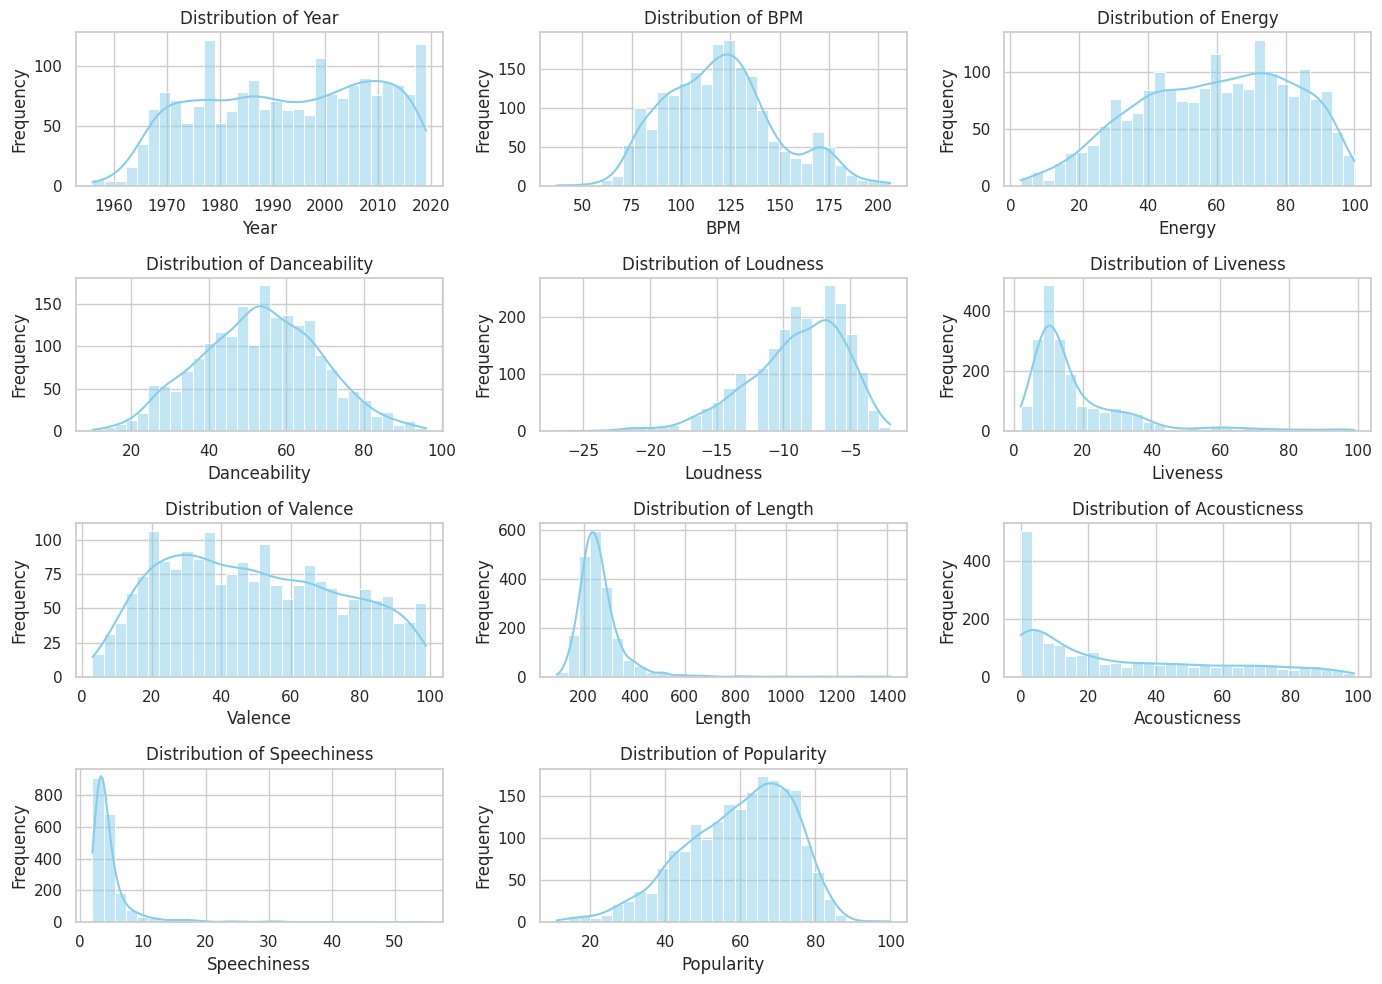

In [ ]:
features = ['Year', 'BPM', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


I think here, we have 2 groups:
- Seems to follow Normal Dsitribution: BPM, Danceability, Energy (Right-Skewed) Popularity (A bit Right-Skewed)
- Outliers:
  Liveness > 50,
  Speechiness > 15,
  Length > 500s

In [ ]:
df.describe()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


I think here from 75% + std. For eg:
- Length: 289 + 93 = 389 --> Lets take 400+ as Outlier
- Same to other features

## Relationship btw Popularity & Selected Features

In [ ]:
selected_features = ['BPM', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Length', 'Popularity']

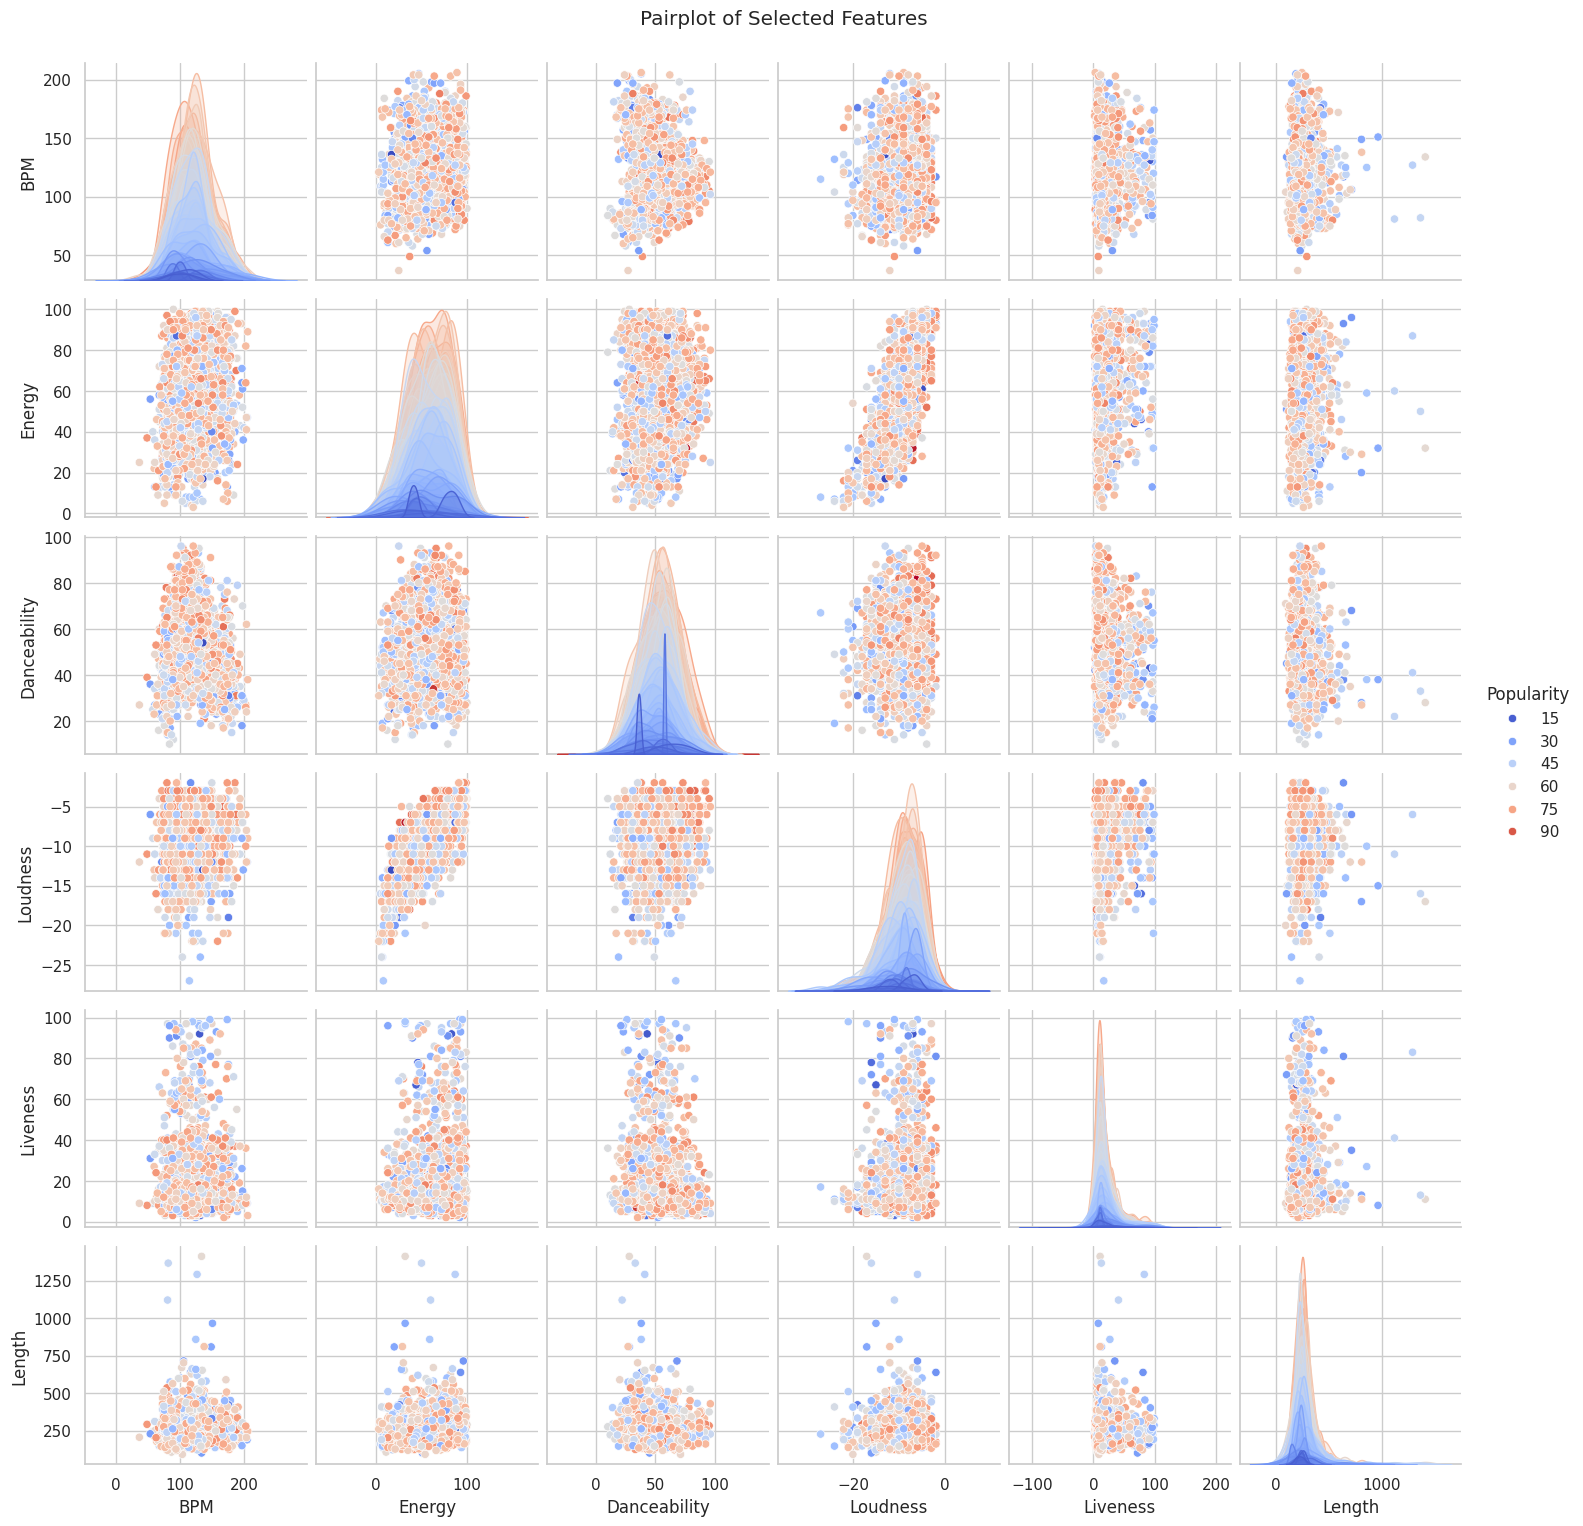

In [ ]:
sns.pairplot(df[selected_features], hue='Popularity', palette='coolwarm', markers='o', height=2.5)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

Temporary dont know how should we interpret

## Correlation

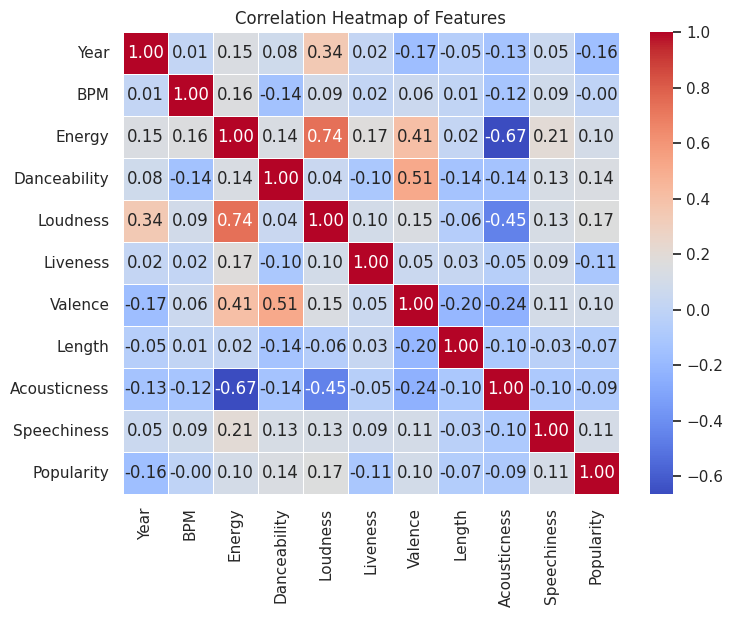

In [ ]:
correlation_matrix = df[features].corr()
#spearman corr

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

We have some strong correlation here:
- Loudness vs. Energy
- Valence vs. Dance & Energy
- Year vs. Loudness? (More Electronic Music trendy?)
- Acoustic vs. Energy & Loudness (Inverse)
- Popularity seems not strong correlation much - Maybe Year, Energy, Dance, Loudness, Liveness & Speechiness

Now, lets zoom in some features seem to have strong correlation with Popularity

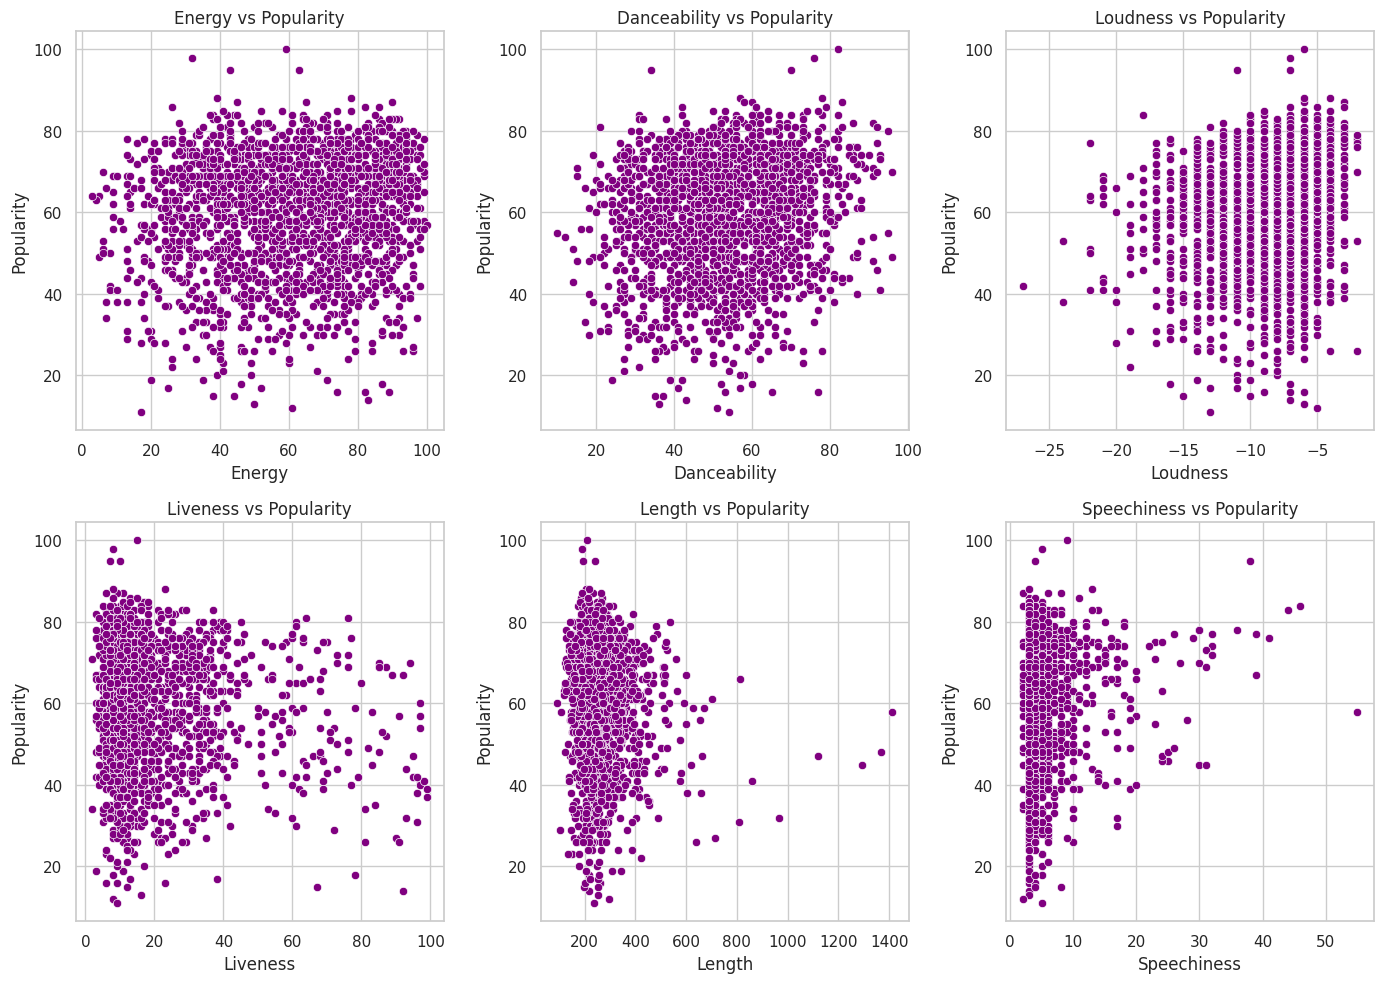

In [ ]:
high_correlated_features = ['Energy', 'Danceability',
       'Loudness', 'Liveness', 'Length', 'Speechiness']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(high_correlated_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['Popularity'], color='purple')
    plt.title(f'{feature} vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

I see Energy, Dance, Loudness are quite more linear relationship with Popularity!

## Genre Trending

In [ ]:
df['Top Genre'].value_counts().head(30)

,count
Top Genre,
album rock,413
adult standards,123
dutch pop,88
alternative rock,86
dance pop,83
dutch indie,75
alternative metal,70
dance rock,52
classic rock,51


<Figure size 1600x800 with 0 Axes>

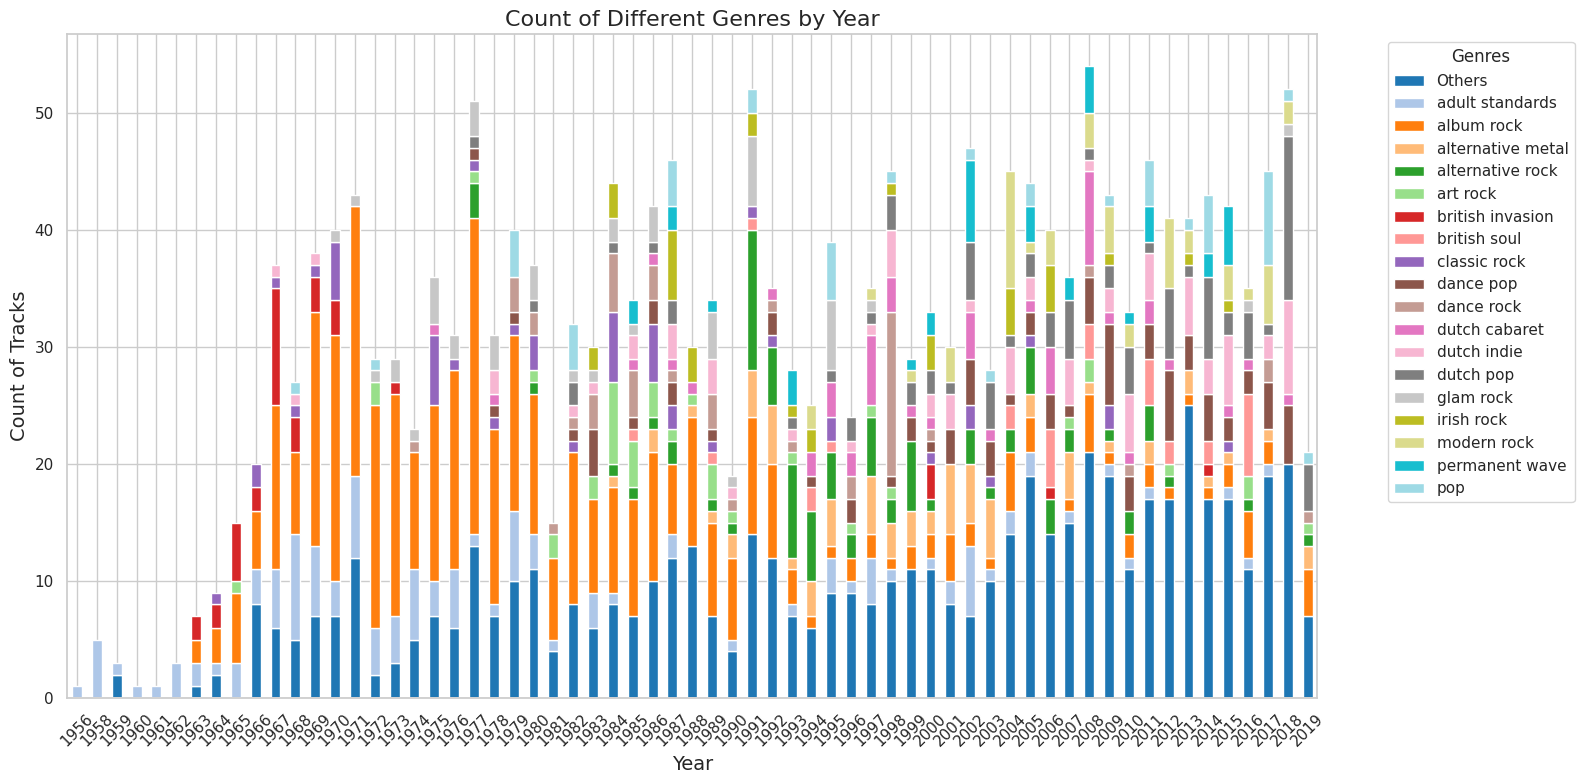

In [ ]:
genre_counts = df['Top Genre'].value_counts()

# Step 1: Classify genres with fewer than 30 occurrences as "Others"
df['Genre'] = df['Top Genre'].apply(lambda x: x if genre_counts[x] >= 30 else 'Others')

genre_plot = df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Step 2: Plot the data
plt.figure(figsize=(16, 8))
genre_plot.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')

# Step 3: Customize the plot
plt.title('Count of Different Genres by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Tracks', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


I see that:
- In the 2nd half of 20th Century, Rock is very popular!
- There is a trend of transition from album rock to Alternative Rock (which is ligher) in late 90s
- The rise of dutch pop in recent year, especially in 2018

# 4.Feature Engineering

## Engineer Audio features

In [ ]:
#Scale numeric features
numeric_features = ['Year', 'BPM', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity']

categorical_features = ['Title', 'Artist', 'Top Genre', 'Lyrics']

scaler = MinMaxScaler()

df_scaled = df.copy()

# Normalize the continuous features (Energy, Danceability)
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])

#I dont think we should encode genre, because its gonna take a lot of sparse happenning and heavy model running. Instead, use BERT for genre

## Embedding Lyrics

In [79]:
df = df_scaled.copy()

In [250]:
# Step 1: Ensure 'Lyrics' column is filled with valid strings
df['Lyrics'] = df['Lyrics'].fillna('')  # Replace NaN with empty strings
df['Lyrics'] = df['Lyrics'].astype(str)  # Ensure all entries are strings

In [18]:
# Initialize BERT model
bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [251]:
# Step 1: Preprocess the dataset
# Generate BERT embeddings for lyrics
df['Lyrics_Embedding'] = df['Lyrics'].apply(lambda x: bert_model.encode(x))

In [258]:
df.to_csv('Spotify-2000-lyrics-embedding.csv')

# 5.Model Building - Please start from here

In [205]:
#load the df with embedding first

df = pd.read_csv('Spotify-2000-lyrics-embedding.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

# Because when I save to csv, it become str type. Need to convert back to np array
df['Lyrics_Embedding'] = df['Lyrics_Embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

#need to run again if we load the df here
bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
df.head()

,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Lyrics,Lyrics_Embedding
0,Sunrise,Norah Jones,adult standards,0.761905,0.710059,0.278351,0.500000,0.52,0.092784,0.677083,0.081880,0.949495,0.018868,0.674157,18 ContributorsTranslationsDeutschSunrise Lyri...,"[-0.0874051601, 0.0103424443, 0.160345301, 0.1..."
1,Black Night,Deep Purple,album rock,0.698413,0.579882,0.783505,0.465116,0.64,0.154639,0.812500,0.086429,0.171717,0.094340,0.314607,15 ContributorsBlack Night Lyrics[Intro]\n\n[V...,"[0.01572801, 0.07730728, 0.08891378, 0.1692392..."
2,Clint Eastwood,Gorillaz,alternative hip hop,0.714286,0.775148,0.680412,0.651163,0.72,0.051546,0.510417,0.188021,0.020202,0.283019,0.651685,243 ContributorsTranslationsFrançaisTürkçeDeut...,"[-0.0455714017, 0.0688462108, 0.298931122, -0...."
3,The Pretender,Foo Fighters,alternative metal,0.809524,0.804734,0.958763,0.383721,0.92,0.010309,0.354167,0.133434,0.000000,0.037736,0.730337,90 ContributorsTranslationsEspañolThe Pretende...,"[0.07994969, -0.25466976, 0.19738841, -0.08453..."
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,0.730159,0.408284,0.814433,0.558140,0.88,0.082474,0.875000,0.123578,0.010101,0.018868,0.539326,14 ContributorsWaitin’ on a Sunny Day Lyrics[V...,"[-0.13835232, -0.0103984596, 0.577226996, 0.22..."


## Setup df for Recommender

In [206]:
#Setup song_id as index lookup

df['song_id'] = range(1, len(df) + 1)

#Setup df_normalized for Content-filtering recommender based on Audio Features

df_normalized = df[['song_id', 'BPM', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity']]

#Setup filtered_df for Lyrics-based Recommender

filtered_df = df[['song_id','Lyrics_Embedding']]

## Recommender Function

In [207]:
# Guideline: We have 2 small recommenders - Audio features and Lyrics. We need to set weight for each
audio_weight = 0.7
lyrics_weight = 1 - audio_weight

def recommend_songs(song_id_or_query, df, df_normalized, filtered_df, num_songs=50):
    """
    Combines audio features and lyrics similarity to return song recommendations.

    Args:
    song_id_or_query: Song ID (if content-based) or textual query (if lyrics-based)
    df: DataFrame with song data for audio recommender
    df_normalized: Normalized DataFrame for audio recommender
    filtered_df: DataFrame with lyrics embeddings
    num_songs: Number of recommendations to return

    Returns:
    pd.DataFrame with recommended songs
    """
    def content_filter_music_recommender(song_id, N):
        """Calculate audio similarity based on cosine similarity."""
        distance_method = cosine_similarity
        all_songs = df_normalized.index[df_normalized.index != song_id]
        distances = [
            distance_method(
                [df_normalized.loc[song_id].values],
                [df_normalized.loc[other_id].values]
            )[0][0]
            for other_id in all_songs
        ]
        # Create a DataFrame of results
        audio_similarity_df = pd.DataFrame({
            'song_id': all_songs,
            'audio_similarity': distances
        })
        # No scaling required as df_normalized is already normalized
        return audio_similarity_df.sort_values(by="audio_similarity", ascending=False).head(N)

    # Determine if query is text or song_id
    if isinstance(song_id_or_query, int):
        # Use content-based filtering for song_id
        audio_recommendations = content_filter_music_recommender(song_id_or_query, num_songs)
        audio_recommendations = pd.merge(audio_recommendations, df, on="song_id", how="left")
    else:
        # Lyrics-based filtering for textual queries
        query_embedding = bert_model.encode(song_id_or_query)
        filtered_df['lyrics_similarity'] = filtered_df['Lyrics_Embedding'].apply(
            lambda x: cosine_similarity([query_embedding], [x])[0][0]
        )
        # Normalize lyrics similarity
        scaler = MinMaxScaler()
        filtered_df['lyrics_similarity'] = scaler.fit_transform(filtered_df[['lyrics_similarity']])
        # Merge with main DataFrame
        audio_recommendations = pd.merge(filtered_df, df, on="song_id", how="left")

    # Ensure Lyrics_Embedding is retained after merging
    if 'Lyrics_Embedding' not in audio_recommendations.columns:
        audio_recommendations = pd.merge(audio_recommendations, filtered_df[['song_id', 'Lyrics_Embedding']], on="song_id", how="left")

    # Combine audio and lyrics similarities
    if 'audio_similarity' in audio_recommendations:
        audio_recommendations['Similarity'] = (
            audio_weight * audio_recommendations['audio_similarity'] +
            lyrics_weight * audio_recommendations.get('lyrics_similarity', 0)
        )
    else:
        audio_recommendations['Similarity'] = audio_recommendations['lyrics_similarity']

    # Sort recommendations and return top results
    recommendations = audio_recommendations.sort_values(by="Similarity", ascending=False).head(num_songs)
    return recommendations[['Title', 'Artist', 'Top Genre', 'Similarity', 'Lyrics_Embedding']]

## Test Query

In [208]:
#Case 1: Test Music features
num_songs = 5
queries = 'Suggest me some christmas songs'

print(f"Query: {queries} (Top {num_songs} results)")
recommend_songs(queries, df, df_normalized, filtered_df, num_songs)

Query: Suggest me some christmas songs (Top 5 results)


C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = filtered_df['Lyrics_Embedding'].apply(
C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = scaler.fit_transform(filtered_df[['lyrics_similarity']])


,Title,Artist,Top Genre,Similarity,Lyrics_Embedding
645,Happy Xmas (War Is Over),John Lennon,album rock,1.000000,"[0.06340614, 0.2341811, 0.56069446, -0.0303860..."
1641,All I Want for Christmas Is You,Mariah Carey,dance pop,0.960992,"[-0.12091314, 0.35958758, 0.317838132, 0.06551..."
1452,Fairytale of New York (feat. Kirsty MacColl),The Pogues,celtic punk,0.901285,"[-0.0557949468, 0.149971366, 0.277934462, 0.27..."
214,Driving Home for Christmas,Chris Rea,art rock,0.896672,"[0.04977613, -0.08594131, 0.34660915, 0.136231..."
417,Christmas Lights,Coldplay,permanent wave,0.862446,"[0.160297811, 0.0478892699, 0.311868191, 0.319..."


In [209]:
#Case 2: Test event context
num_songs = 5
queries = 'I need music for a prom'

print(f"Query: {queries} (Top {num_songs} results)")
recommend_songs(queries, df, df_normalized, filtered_df, num_songs)

Query: I need music for a prom (Top 5 results)


C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = filtered_df['Lyrics_Embedding'].apply(
C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = scaler.fit_transform(filtered_df[['lyrics_similarity']])


,Title,Artist,Top Genre,Similarity,Lyrics_Embedding
1001,Dancing Queen,ABBA,europop,1.000000,"[0.199349299, -0.179275051, 0.24432613, -0.028..."
1411,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,dance pop,0.900077,"[-0.113087, -0.30747005, 0.13207932, -0.024302..."
1756,Careless Whisper,George Michael,dance rock,0.853714,"[0.189683795, -0.297276437, 0.271447003, -0.14..."
1185,Late in the Evening,Paul Simon,classic rock,0.838296,"[0.18379875, -0.14234173, 0.29885283, -0.15945..."
1242,Let's Dance - 2018 Remaster,David Bowie,album rock,0.837678,"[0.0343099795, -0.349413753, 0.266096383, 0.06..."


In [210]:
#Case 3: Test similar songs
num_songs = 5
queries = 'Suggest me some music like she will be loved'

print(f"Query: {queries} (Top {num_songs} results)")
recommend_songs(queries, df, df_normalized, filtered_df, num_songs)

Query: Suggest me some music like she will be loved (Top 5 results)


C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = filtered_df['Lyrics_Embedding'].apply(
C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = scaler.fit_transform(filtered_df[['lyrics_similarity']])


,Title,Artist,Top Genre,Similarity,Lyrics_Embedding
1145,Weekend Love,Golden Earring,album rock,1.000000,"[-0.0490823165, -0.186693877, 0.190206841, 0.2..."
6,She Will Be Loved,Maroon 5,pop,0.961398,"[0.13919055, -0.0927635, 0.3554438, 0.02240949..."
463,Give Me Love,Ed Sheeran,pop,0.959421,"[-0.05658195, -0.11795437, 0.42167863, 0.14060..."
521,Lola Montez,Volbeat,alternative metal,0.940654,"[-0.01765832, 0.11110903, 0.227972, 0.46715617..."
1214,Is She Really Going Out With Him? - Live,Joe Jackson,album rock,0.940337,"[0.12602694, -0.44025669, 0.2437504, 0.3653406..."


In [211]:
#Case 4: Test music genre
num_songs = 5
queries = 'I want some hiphop songs'

print(f"Query: {queries} (Top {num_songs} results)")
recommend_songs(queries, df, df_normalized, filtered_df, num_songs)

Query: I want some hiphop songs (Top 5 results)


C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = filtered_df['Lyrics_Embedding'].apply(
C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = scaler.fit_transform(filtered_df[['lyrics_similarity']])


,Title,Artist,Top Genre,Similarity,Lyrics_Embedding
1467,I Want It All - Remastered 2011,Queen,glam rock,1.000000,"[0.07957249, -0.18465637, 0.0294004, -0.387653..."
1079,Anarchy in the U.K.,Sex Pistols,punk,0.972840,"[0.21367298, 0.06790791, 0.08903213, -0.196870..."
1438,Tonight (With David Bowie) - Live,Tina Turner,disco,0.970469,"[-0.01568828, -0.45034093, 0.4668583, -0.05380..."
1865,California Dreamin' - Single Version,The Mamas & The Papas,adult standards,0.970469,"[-0.01568828, -0.45034093, 0.4668583, -0.05380..."
125,Crazy In Love (feat. Jay-Z),Beyoncé,dance pop,0.970469,"[-0.01568828, -0.45034093, 0.4668583, -0.05380..."


Main objectives:
- Improve the recommendation
- Adding lyrics - horizontal stack - embedding, transpose from rows into columns - each Lyric has a value - becomming a feature
- Clustering the Recommendation - using the silhoutte score (What is the good score? from 0-1). K-means, each song is gonna be 1 clusters - 2000 clusters? Randomly split into small samples to test. Can be have some overlap, but not much
- Have to print the results of recommendation. Top 5 for randomly 100 songs, merge them into 1 df, clustering them
- Event_tracking: cost money? session
- Using LLM

- Cloud computing: data pipeline, ADB - CI/CD, dbt, Airflow - data transformation
- MLOps: Docker, Vertex AI, Fast API
- Models:

# 6. Evaluation

Concept:
- I will create 3 different queries and use recommend_songs() in step 5 to have results. Merge them into 1 df
- User K-means to have 3 Clusters (k=3)
- Visualize them via PCA - see how each clusters well-separated together
- Calculate sillhoutte_score


In [212]:
def evaluate_clusters_for_queries(query1, query2, query3, df, n_clusters=3, num_songs=100):
    """
    Evaluates clustering of songs recommended for three different queries, calculates silhouette score,
    and visualizes the separation of clusters.
    """
    # Step 1: Get the recommendations for all three queries
    recommendations_query1 = recommend_songs(query1, df, df_normalized, filtered_df, num_songs)
    recommendations_query2 = recommend_songs(query2, df, df_normalized, filtered_df, num_songs)
    recommendations_query3 = recommend_songs(query3, df, df_normalized, filtered_df, num_songs)
    
    # Step 2: Combine the recommendations from all three queries
    recommendations_combined = pd.concat([recommendations_query1, recommendations_query2, recommendations_query3])
    
    # Step 3: Extract the embeddings (Lyrics_Embedding) and create a DataFrame
    embeddings = np.vstack(recommendations_combined['Lyrics_Embedding'].dropna())  # Drop NaNs if present
    
    # Step 4: Apply PCA for dimensionality reduction to 2D for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Step 5: Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    recommendations_combined['Cluster'] = kmeans.fit_predict(embeddings_2d)
    
    # Step 6: Calculate silhouette score
    silhouette_avg = silhouette_score(embeddings_2d, recommendations_combined['Cluster'])
    
    # Step 7: Visualize the clusters using a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=recommendations_combined['Cluster'], palette='Set2', s=100)
    plt.title(f'Cluster Visualization (Silhouette Score: {silhouette_avg:.2f})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster', loc='upper right')
    plt.show()
    
    # Step 8: Return the top N songs for each query
    print(f"Recommendations for Query 1: {query1}")
    print(recommendations_query1[['Title', 'Artist', 'Top Genre', 'Similarity']].head())
    
    print(f"\nRecommendations for Query 2: {query2}")
    print(recommendations_query2[['Title', 'Artist', 'Top Genre', 'Similarity']].head())
    
    print(f"\nRecommendations for Query 3: {query3}")
    print(recommendations_query3[['Title', 'Artist', 'Top Genre', 'Similarity']].head())
    
    # Return silhouette score
    return silhouette_avg

C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = filtered_df['Lyrics_Embedding'].apply(
C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lyrics_similarity'] = scaler.fit_transform(filtered_df[['lyrics_similarity']])
C:\Users\a00578421\AppData\Local\Temp\ipykernel_812\1778246724.py:46: SettingWithCopyWarning: 
A value is trying t

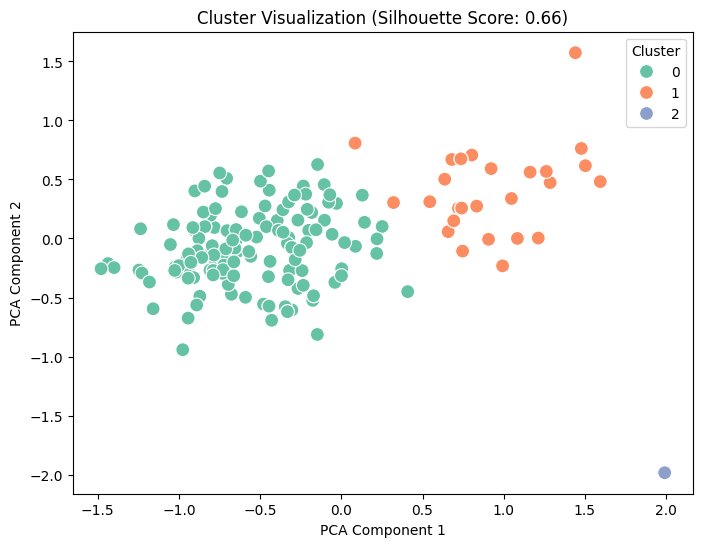

Recommendations for Query 1: I want some rock music
                                Title           Artist           Top Genre  \
1312                Money for Nothing     Dire Straits          album rock   
1147   Rock with You - Single Version  Michael Jackson                 pop   
1377  Walk This Way (feat. Aerosmith)       Run–D.M.C.  east coast hip hop   
1053                Let There Be Rock            AC/DC          album rock   
656                 Whatever You Want       Status Quo          album rock   

      Similarity  
1312    1.000000  
1147    0.992756  
1377    0.928668  
1053    0.898943  
656     0.893370  

Recommendations for Query 2: I want some peaceful music
                                Title      Artist           Top Genre  \
1179              The Spirit Of Radio        Rush          album rock   
1874                       I Want You   Bob Dylan          album rock   
985                      Crazy On You       Heart          album rock   
1185            

In [213]:
query1 = "I want some rock music"
query2 = "I want some peaceful music"
query3 = "I want some upbeat music"
silhouette_score_value = evaluate_clusters_for_queries(query1, query2, query3, df, n_clusters=3)
print(f"Silhouette Score: {silhouette_score_value}")